<a href="https://colab.research.google.com/github/unjike/Heat-Transfer-and-Phase-Change/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Alan Maida
# Ursan Tchouteng Njike
# ME 258
# Project 2
# Analysis of a Heat Pipe Heat Exchanger

#importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

# Task 1
# Creating a curve fit for the properties of water and R245fa

# For water,  
# temperature
T_w = np.arange(0,80.01,5) + 273 #K

# thermal conductivity
k_wl = np.array([561, 570.5, 580, 589.3, 598.4, 607.2, 615.5, 623.3, 630.6, 637.3, 643.6, 649.2, 654.3, 659, 663.1, 666.8, 670.])/1000 #W/(m.K)

# density of liquid water
rho_wl = np.array([999.8, 999.9, 999.7, 999.1, 998.2, 997, 995.6, 994, 992.2, 990.2, 988.0, 985.7, 983.2, 980.5, 977.7, 974.8, 971.8]) #kg/m^3

# density of vapor water
rho_wv = 1/np.array([205.99, 147.01, 106.3, 77.875, 57.757, 43.337, 32.878, 25.205, 19.515, 15.252, 12.027, 9.5643, 7.6672, 6.1935, 5.0395, 4.1289, 3.4052]) #kg/m^3

# viscosity of liquid water
mu_wl = np.array([1791.2, 1518.3, 1306, 1137.6, 1001.6, 890.1, 797.4, 719.3, 653.0, 596.1, 546.8, 504.0, 466.4, 433.2, 403.9, 377.7, 354.3]) #Pa.s

# viscosity of vapor water
mu_wv = np.array([9.22, 9.34, 9.46, 9.59, 9.73, 9.87, 10.01, 10.16, 10.31, 10.46, 10.62, 10.77, 10.93, 11.10, 11.26, 11.43, 11.59]) #Pa.S

# For R245fa,  
# temperature
T_r = np.arange(0, 80.01, 2) + 273 #K

# thermal conductivity of liquid refrigerant 245fa
k_rl = np.array([88.8, 88.2, 87.5, 86.8, 86.2, 85.5, 84.9, 84.2, 83.6, 82.9, 82.3, 81.7, 81.0, 80.4, 79.8, 79.2, 78.6, 77.9, 77.3, 76.7, 76.1, 75.5, 74.9, 74.3, 73.7, 73.1, 72.5, 72.0, 71.4, 70.8, 70.2, 69.6, 69.0, 68.5, 67.9, 67.3, 66.8, 66.2, 65.6, 65.0, 64.5])/1000 #W/(m.K)


# density of liquid refrigerant 245fa
rho_rl = np.array([1404.0, 1399.0, 1393.9, 1388.8, 1383.7, 1378.5, 1373.3, 1368.1, 1362.8, 1357.5, 1352.2, 1346.9, 1341.5, 1336.1, 1330.6, 1325.1, 1319.6, 1314.0, 1308.4, 1302.7, 1297.0, 1291.2, 1285.4, 1279.6, 1273.7, 1267.7, 1261.7, 1255.6, 1249.5, 1243.3, 1237.0, 1230.7, 1224.3, 1217.8, 1211.3, 1204.7, 1198.0, 1191.2, 1184.3, 1177.3, 1170.3]) #kg/m^3

# density of vapor refrigerant 245fa 
rho_rv = 1/np.array([0.30756,0.28251,0.25987,0.23939,0.22082,0.20397,0.18864,0.17469,0.16197,0.15035,0.13972,0.13000,0.12108,0.11289,0.10536,0.09843,0.09205,0.08616,0.08072,0.07569,0.07103,0.06671,0.06271,0.05899,0.05554,0.05232,0.04933,0.04653,0.04393,0.04149,0.03922,0.03709,0.03509,0.03322,0.03147,0.02982,0.02828,0.02682, 0.02545, 0.02416, 0.02295]) #kg/m^3

# viscosity of liquid refrigerant 245fa
mu_rl = np.array([581.6, 563.4, 546.1, 529.5, 513.6, 498.5, 483.9, 470.0, 456.7, 443.8, 431.5, 419.6, 408.2, 397.2, 386.6, 376.4, 366.5, 356.9, 347.7, 338.8, 330.1, 321.8, 313.7, 305.8, 298.2, 290.8, 283.6, 276.6, 269.8, 263.1, 256.7, 250.4, 244.3, 238.3, 232.5, 226.8, 221.3, 215.9, 210.6, 205.4, 200.3]) #Pa.s

# viscosity of vapor refrigerant 245fa
mu_rv = np.array([9.47, 9.53, 9.60, 9.67, 9.74, 9.81, 9.88, 9.95, 10.02, 10.09, 10.16, 10.23, 10.30, 10.37, 10.44, 10.51, 10.59, 10.66, 10.73, 10.80, 10.87, 10.94, 11.01, 11.09, 11.16, 11.23, 11.31, 11.38, 11.46, 11.53, 11.61, 11.69, 11.76, 11.84, 11.92, 12.01, 12.09, 12.17, 12.26, 12.34, 12.43]) #Pa.S

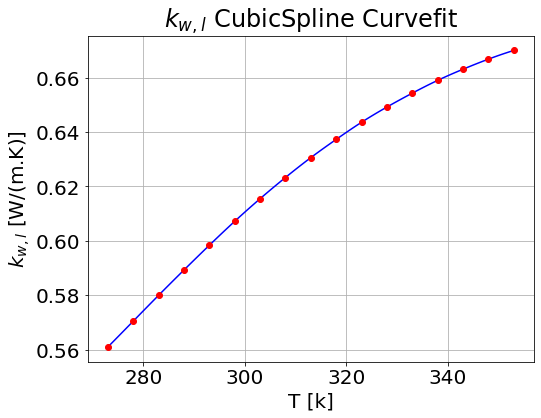

In [ ]:
#plotting curve fit for thermal conductivity of water

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_w, k_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_w, k_wl, 'ro')
plt.title('$k_{w,l}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$k_{w,l}$ [W/(m.K)]')
plt.show()

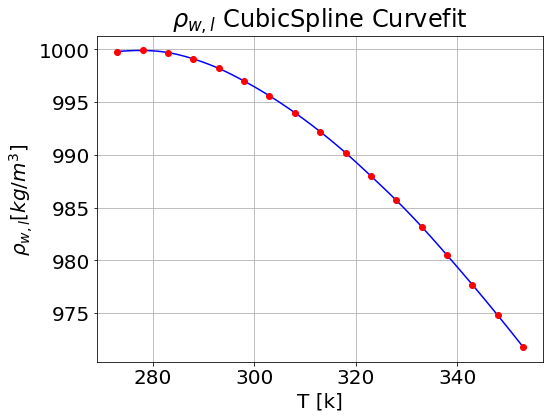

In [ ]:
#plotting curve fit for density of water

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_w, rho_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_w, rho_wl, 'ro')
plt.title('$\u03C1_{w,l}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{w,l} [kg/m^3]$')
plt.show()

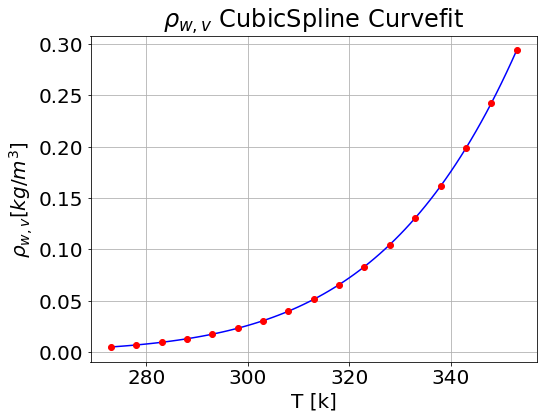

In [ ]:
#plotting curve fit for density of steam

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_w, rho_wv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_w, rho_wv, 'ro')
plt.title('$\u03C1_{w,v}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{w,v} [kg/m^3]$')
plt.show()

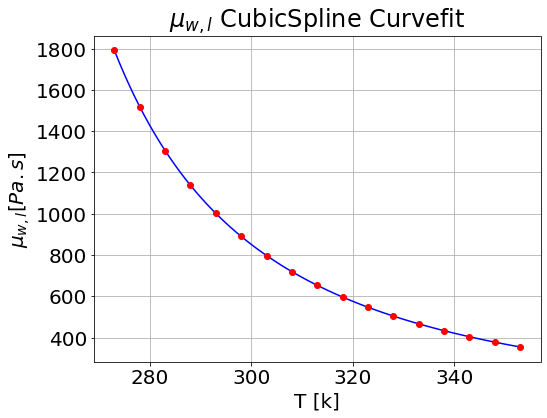

In [ ]:
#plotting curve fit for viscosity of water

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_w, mu_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_w, mu_wl, 'ro')
plt.title('$\mu_{w,l}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\mu_{w,l} [Pa.s]$')
plt.show()

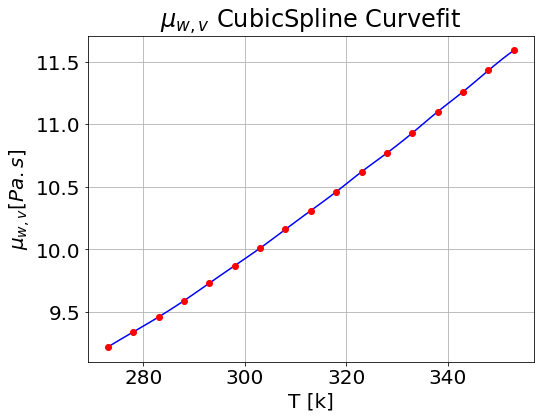

In [ ]:
#plotting curve fit for viscosity of steam

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_w, mu_wv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_w, mu_wv, 'ro')
plt.title('$\mu_{w,v}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\mu_{w,v} [Pa.s]$')
plt.show()

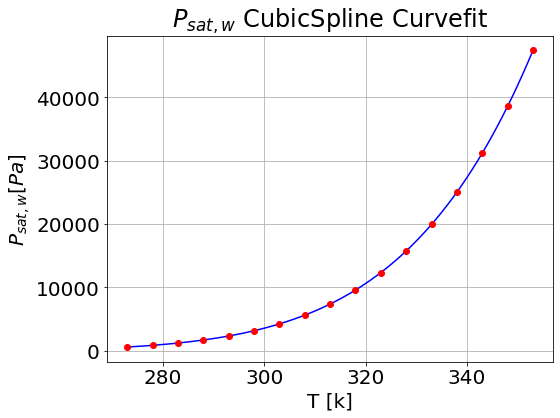

In [ ]:
Pw = np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6 # Pa

#plotting curve fit for saturated pressure

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_w, Pw)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_w, Pw, 'ro')
plt.title('$P_{sat,w}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$P_{sat,w} [Pa]$')
plt.show()

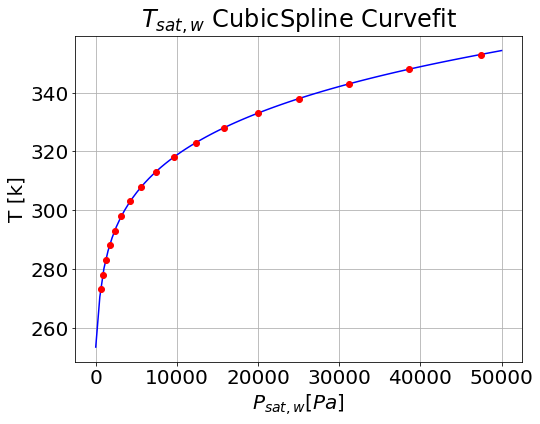

In [ ]:
Pw = np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6 # Pa

#plotting curve fit for saturated temperature

P = np.linspace(0,50000,100) #K
f = interpolate.CubicSpline(Pw, T_w)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(P, f(P), 'b', Pw, T_w, 'ro')
plt.title('$T_{sat,w}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('$P_{sat,w} [Pa]$')
plt.ylabel('T [k]')
plt.show()

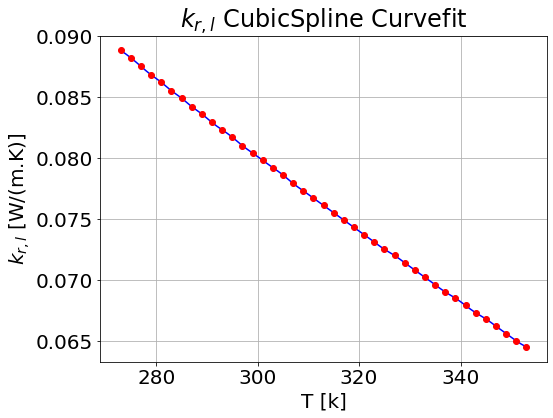

In [ ]:
#plotting curve fit for thermal conductivity of water

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_r, k_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_r, k_rl, 'ro')
plt.title('$k_{r,l}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$k_{r,l}$ [W/(m.K)]')
plt.show()

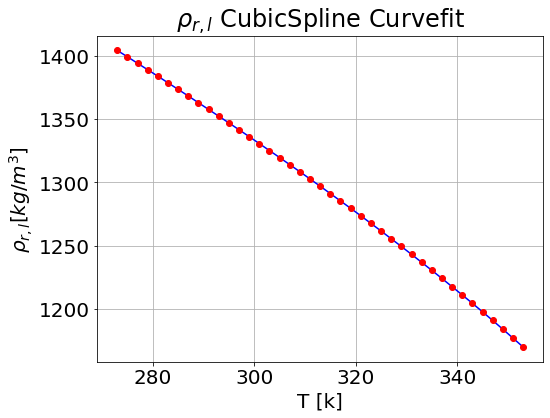

In [ ]:
#plotting curve fit for density of water

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_r, rho_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_r, rho_rl, 'ro')
plt.title('$\u03C1_{r,l}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{r,l} [kg/m^3]$')
plt.show()

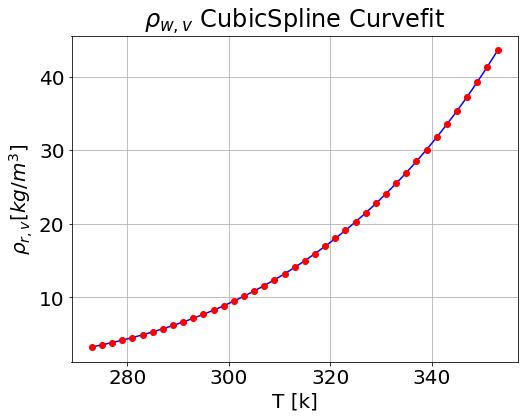

In [ ]:
#plotting curve fit for density of steam

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_r, rho_rv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_r, rho_rv, 'ro')
plt.title('$\u03C1_{r,v}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{r,v} [kg/m^3]$')
plt.show()

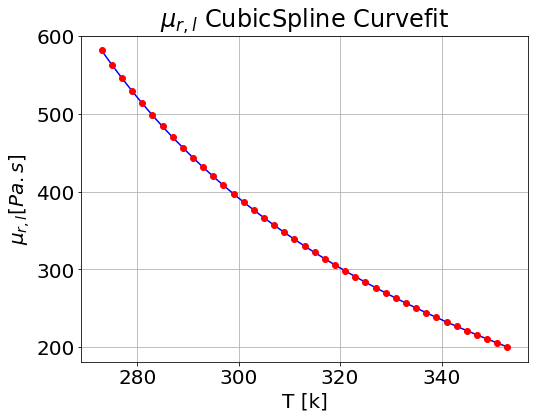

In [ ]:
#plotting curve fit for viscosity of water

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_r, mu_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_r, mu_rl, 'ro')
plt.title('$\mu_{r,l}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\mu_{r,l} [Pa.s]$')
plt.show()

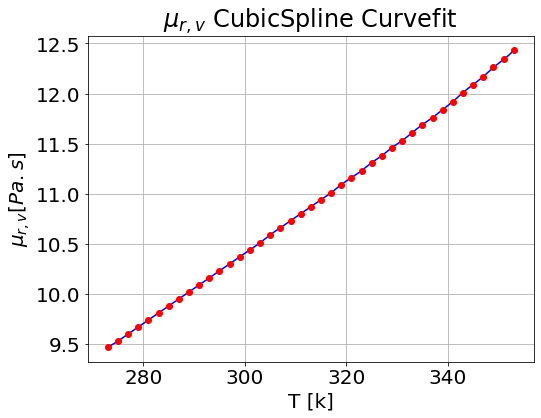

In [ ]:
#plotting curve fit for viscosity of steam

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_r, mu_rv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_r, mu_rv, 'ro')
plt.title('$\mu_{r,v}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$\mu_{r,v} [Pa.s]$')
plt.show()

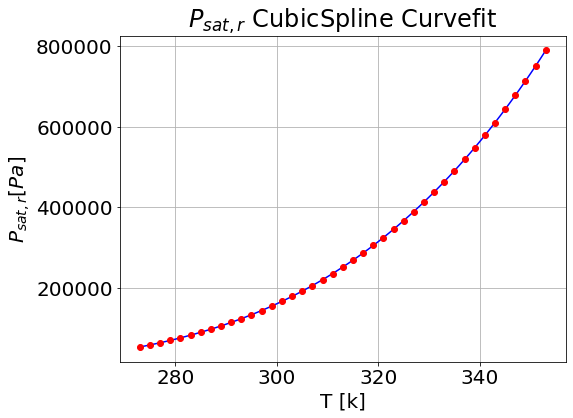

In [ ]:
Pr = np.array([0.05359, 0.05866, 0.06411, 0.0699, 0.07622, 0.08293, 0.09009, 0.09774, 0.1058, 0.11457, 0.12380, 0.13360, 0.14400, 0.15503, 0.16670, 0.17904, 0.19209, 0.20586, 0.22038, 0.23568, 0.2519, 0.26873, 0.28654, 0.30523, 0.32485, 0.34542, 0.36696, 0.38951, 0.4131, 0.43777, 0.46353, 0.49043, 0.51849, 0.54774, 0.57823, 0.60998, 0.64302, 0.67739, 0.71313, 0.75026, 0.78882])*10**6

# Pw = np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6 # Pa

#plotting curve fit for saturated pressure

T = np.arange(0,80.01,1) + 273 #K
f = interpolate.CubicSpline(T_r, Pr)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f(T), 'b', T_r, Pr, 'ro')
plt.title('$P_{sat,r}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('T [k]')
plt.ylabel('$P_{sat,r} [Pa]$')
plt.show()

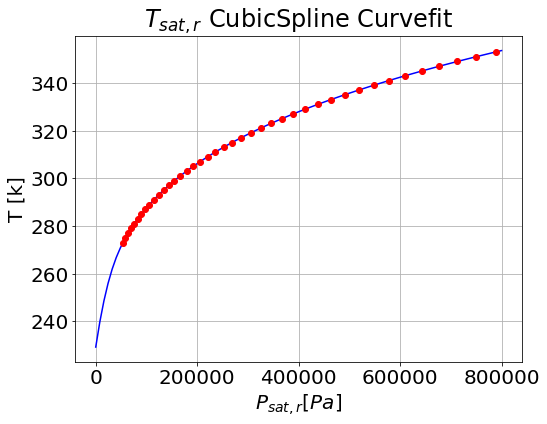

In [ ]:
#plotting curve fit for saturated temperature

P = np.linspace(0,800000,100) #K
f = interpolate.CubicSpline(Pr, T_r)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(P, f(P), 'b', Pr, T_r, 'ro')
plt.title('$T_{sat,r}$ CubicSpline Curvefit')
plt.grid()
plt.xlabel('$P_{sat,r} [Pa]$')
plt.ylabel('T [k]')
plt.show()